# CHARISMA: Demonstration of Chada library

In [1]:
from ramanchada import chada,chada_utilities,chada_io

Create a CHADA archive from native Raman file

In [2]:
#Set paths
import os, os.path
native_file = os.path.join(os.path.expanduser("~"),"Desktop","200218-17.wdf")


In [3]:
chada_file = chada_io.create(native_file)
print(native_file,chada_file)

C:\Users\jelia\Desktop\200218-17.wdf C:\Users\jelia\Desktop\200218-17.cha


Load CHADA archive into Chada object

In [4]:
C = chada.Chada(chada_file)

Show unprocessed data

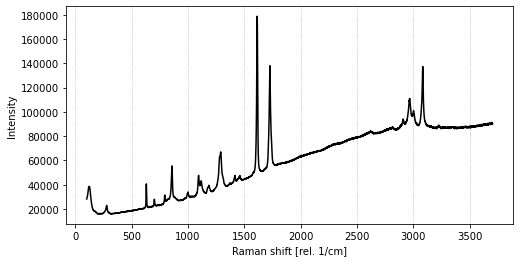

In [5]:
C.plot()

There are commits just as in GIT

In [6]:
C.commits

['Generated CHADA on Tue May 18 17:56:08 2021']

Show metadata

In [7]:
C.static_metadata

AttributeError: 'Chada' object has no attribute 'static_metadata'

In [8]:
C.dynamic_metadata

AttributeError: 'Chada' object has no attribute 'dynamic_metadata'

In [9]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Tue May 18 17:56:08 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

Now separate a baseline

In [10]:
C.baseline(show=True)

AttributeError: 'Chada' object has no attribute 'baseline'

In [11]:
C.fit_baseline()
C.remove_baseline()

The data has been updated

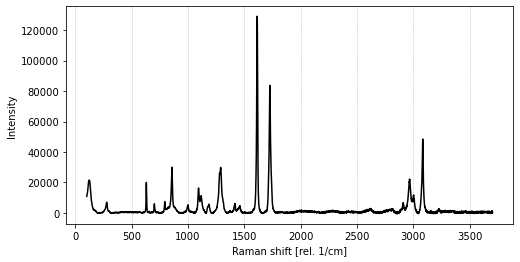

In [12]:
C.plot()

In [13]:
import pandas as pd

The baseline separation appears in the transformers list

In [14]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101439312282, 17487.8...
dtype: object

In [15]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Tue May 18 17:56:08 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

The dynamic metadata changes

In [16]:
C.dynamic_metadata

AttributeError: 'Chada' object has no attribute 'dynamic_metadata'

Crop spectrum k direction

In [17]:
C.x_crop(500, 2500)

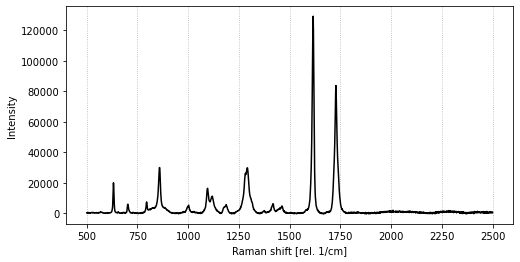

In [18]:
C.plot()

In [19]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101439312282, 17487.8...
1                                  [x_crop, 500, 2500]
dtype: object

In [20]:
C.dynamic_metadata

AttributeError: 'Chada' object has no attribute 'dynamic_metadata'

In [21]:
C.metadata

{'DIMENSION_LABELS': "['Raman shift [1/cm]' 'Counts']",
 'Generated on': 'Tue May 18 17:56:08 2021',
 'OEM software name': 'WiRE',
 'OEM software version': '[5, 2, 0, 9499]',
 'Original file': '200218-17.wdf',
 'laser wavelength': '514.5011961147924',
 'no. of accumulations': '3',
 'spectral unit': 'Counts'}

Area normalization

In [22]:
C.normalize('area')

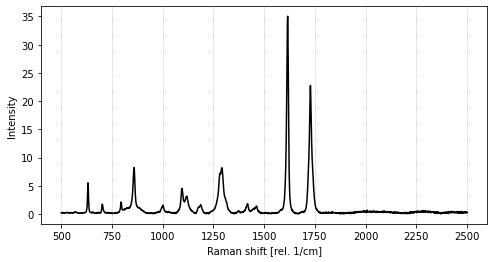

In [23]:
C.plot()

In [24]:
pd.Series(C.transformers)

0    [remove_baseline, [17507.101439312282, 17487.8...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

In [25]:
C.dynamic_metadata

AttributeError: 'Chada' object has no attribute 'dynamic_metadata'

Peak search - this doesn't change the data

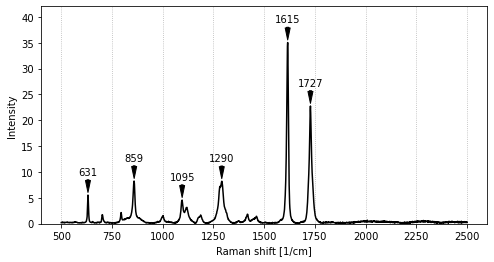

In [26]:
C.peaks(make_plot=True)

The bands list can be extended and exported e.g. to Excel

In [27]:
C.bands

,peak pos [1/cm],peak_heights,prominences,left_bases,right_bases
0,631.638672,0.157273,0.154298,591.667969,754.384766
1,859.189453,0.234517,0.232821,754.384766,1521.193359
2,1095.613281,0.129223,0.128436,952.021484,1226.312500
3,1290.794922,0.233453,0.232817,952.021484,1521.193359
4,1615.630859,1.000000,0.999523,1521.193359,2368.562500
5,1727.773438,0.649378,0.649344,1664.765625,2368.562500


Now we commit. The CHADA file is updated on disk.

In [28]:
C.commit("First round of processing")

Kill the current CHADA object

In [29]:
del C

In [30]:
C

NameError: name 'C' is not defined

Make new Chada object from udated CHADA archive

In [31]:
#D = Chada(r"C:\Users\barton\Desktop\chada\200218-17.cha")
D = chada.Chada(chada_file)

The data is exactly in the state where we made the commit

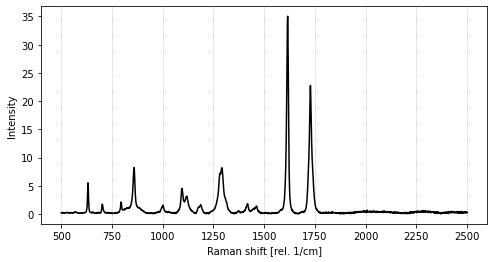

In [32]:
D.plot()

In [33]:
D.commits

['Generated CHADA on Tue May 18 17:56:08 2021', 'First round of processing']

In [34]:
pd.Series(D.transformers)

0    [remove_baseline, [17507.101439312282, 17487.8...
1                                  [x_crop, 500, 2500]
2                                    [normalize, area]
dtype: object

All processing steps can be reverted

Let's go one step back

In [35]:
D.rewind(-1)

In [36]:
pd.Series(D.transformers)

0    [remove_baseline, [17507.101439312282, 17487.8...
1                                  [x_crop, 500, 2500]
dtype: object

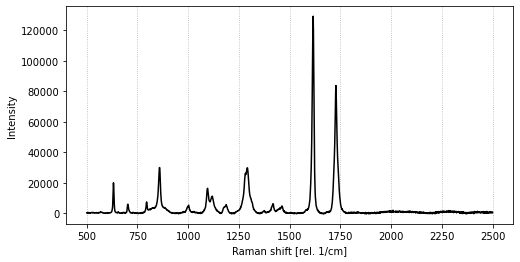

In [37]:
D.plot()

And now all the way to the original data

In [38]:
D.rewind(0)

In [39]:
pd.Series(D.transformers)

<ipython-input-39-3dc5e5344720>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(D.transformers)


Series([], dtype: float64)

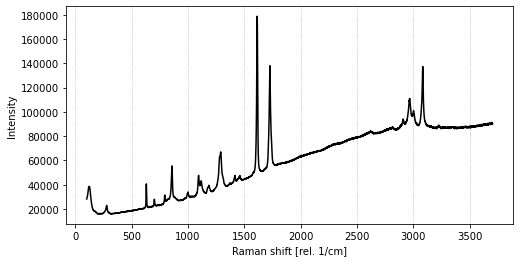

In [40]:
D.plot()

Create a CHADA archive from native Raman file

In [41]:
DATA_FILES = "\\vm-stor-51\alle\Projekte Kunststoffe\RD\MA\Öffentliche_Projekte\2020-01-07_230007_H2020-CHARISMA_barton\Python\charisma-raman-spectrum-harmonization\test_data\\"
DATA_FILES = "D:\\nina\DATA\CHARISMA"

#not sure where to get this file from 
test_file = "SILICON_x20_1%_02.spc"
#so using this one instead
test_file = "Si100NoDope_S02.spc"
chada_file = chada_io.create(os.path.join(DATA_FILES,test_file))

ModuleNotFoundError: No module named 'spc'

Load CHADA archive into Chada object

In [42]:
E = chada.Chada(chada_file)

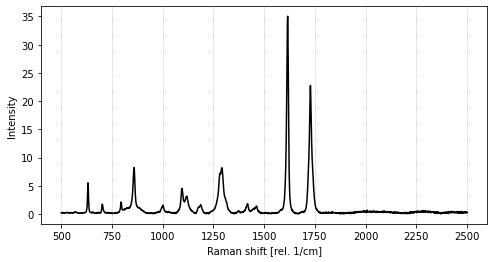

In [43]:
E.plot()

Show metadata

In [44]:
E.static_metadata

AttributeError: 'Chada' object has no attribute 'static_metadata'

In [45]:
E.dynamic_metadata

AttributeError: 'Chada' object has no attribute 'dynamic_metadata'

In [46]:
E.baseline(show=True)

TypeError: 'numpy.ndarray' object is not callable

Crop spectrum k direction

In [47]:
E.x_crop(200, 1200)

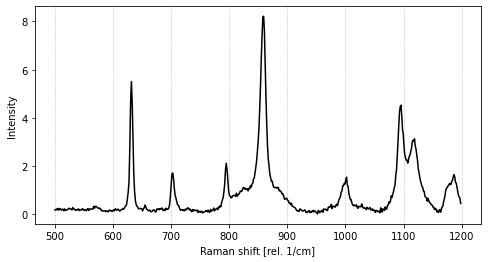

In [48]:
E.plot()

Area normalization

In [49]:
E.normalize('area')

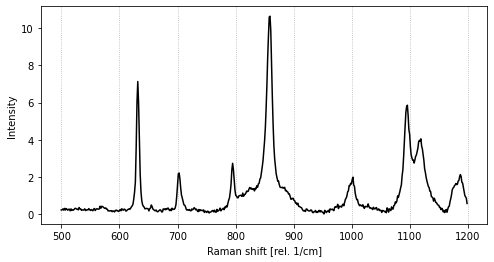

In [50]:
E.plot()

Peak search - this doesn't change the data

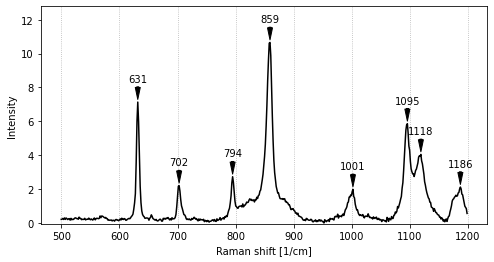

In [51]:
E.peaks(make_plot=True)